In [1]:
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
NUM_CLASSES = 10

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
train_images = train_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [4]:
best_model = None
best_acc = 0.0

### Conv + Pool

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nError Rate на проверочных данных :', 1 - test_acc)

if test_acc > best_acc: best_model = model

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 208us/sample - loss: 0.4418 - accuracy: 0.8463
Epoch 2/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.3122 - accuracy: 0.8893
Epoch 3/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.2772 - accuracy: 0.9025
Epoch 4/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2543 - accuracy: 0.9097
Epoch 5/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2358 - accuracy: 0.9167
Epoch 6/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2204 - accuracy: 0.9219
Epoch 7/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2083 - accuracy: 0.9263
Epoch 8/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.1947 - accuracy: 0.9301
Epoch 9/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.1851 - accuracy: 0.9

### Conv + Pool + Conv

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nError Rate на проверочных данных :', 1 - test_acc)

if test_acc > best_acc: best_model = model

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 532us/sample - loss: 0.3859 - accuracy: 0.8631
Epoch 2/10
60000/60000 [==============================] - 32s 527us/sample - loss: 0.2601 - accuracy: 0.9073
Epoch 3/10
60000/60000 [==============================] - 32s 528us/sample - loss: 0.2152 - accuracy: 0.9232
Epoch 4/10
60000/60000 [==============================] - 32s 527us/sample - loss: 0.1857 - accuracy: 0.9329
Epoch 5/10
60000/60000 [==============================] - 32s 532us/sample - loss: 0.1603 - accuracy: 0.9409
Epoch 6/10
60000/60000 [==============================] - 32s 528us/sample - loss: 0.1398 - accuracy: 0.9488
Epoch 7/10
60000/60000 [==============================] - 32s 527us/sample - loss: 0.1223 - accuracy: 0.9563
Epoch 8/10
60000/60000 [==============================] - 32s 529us/sample - loss: 0.1060 - accuracy: 0.9626
Epoch 9/10
60000/60000 [==============================] - 32s 528us/sample - loss: 0.0923 - accuracy: 0.9

### Conv + Conv + Pool

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nError Rate на проверочных данных :', 1 - test_acc)

if test_acc > best_acc: best_model = model

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.3733 - accuracy: 0.8684
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2451 - accuracy: 0.9129
Epoch 3/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2034 - accuracy: 0.9260
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.1729 - accuracy: 0.9373
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.1474 - accuracy: 0.9469
Epoch 6/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.1231 - accuracy: 0.9553
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1070 - accuracy: 0.9615
Epoch 8/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0901 - accuracy: 0.9681
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0797 - accuracy: 0.9716
Epoch 10/10
60

### Conv + Pool + Conv + Pool

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nError Rate на проверочных данных :', 1 - test_acc)

if test_acc > best_acc: best_model = model

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 592us/sample - loss: 0.3947 - accuracy: 0.8579
Epoch 2/10
60000/60000 [==============================] - 35s 589us/sample - loss: 0.2565 - accuracy: 0.9059
Epoch 3/10
60000/60000 [==============================] - 35s 590us/sample - loss: 0.2116 - accuracy: 0.9222
Epoch 4/10
60000/60000 [==============================] - 36s 595us/sample - loss: 0.1800 - accuracy: 0.9341
Epoch 5/10
60000/60000 [==============================] - 35s 590us/sample - loss: 0.1520 - accuracy: 0.9434
Epoch 6/10
60000/60000 [==============================] - 35s 587us/sample - loss: 0.1292 - accuracy: 0.9512
Epoch 7/10
60000/60000 [==============================] - 35s 587us/sample - loss: 0.1065 - accuracy: 0.9601
Epoch 8/10
60000/60000 [==============================] - 35s 585us/sample - loss: 0.0893 - accuracy: 0.9675
Epoch 9/10
60000/60000 [==============================] - 35s 588us/sample - loss: 0.0745 - accuracy: 0.9

In [10]:
def confusion_matrix(actual, pred):
    cm = [[0 for j in range(NUM_CLASSES)] for i in range(NUM_CLASSES)]
    most_similar = [(-1, 0.0) for i in range(NUM_CLASSES * NUM_CLASSES)]

    for (i, labels_prob) in enumerate(pred):
        label = K.argmax(labels_prob)
        cm[actual[i]][label] += 1

        if labels_prob[label] > most_similar[actual[i] * NUM_CLASSES + label][1]:
            most_similar[actual[i] * NUM_CLASSES + label] = (i, labels_prob[label])

    return cm, most_similar

In [11]:
pred_labels = best_model.predict(test_images)

In [12]:
class_names = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто', 'Сандали', 'Блузка', 'Кроссовки', 'Сумка', 'Ботильоны']
print(class_names)

['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто', 'Сандали', 'Блузка', 'Кроссовки', 'Сумка', 'Ботильоны']


Матрица неточностей для лучшей модели

In [13]:
cm, most_similar = confusion_matrix(test_labels, pred_labels)
print(pd.DataFrame(cm))

     0    1    2    3    4    5    6    7    8    9
0  857    0   19   12    3    0  105    1    3    0
1    1  983    1   12    0    0    3    0    0    0
2   21    1  895    5   30    0   48    0    0    0
3   16    1   10  923   26    0   24    0    0    0
4    2    0   62   18  868    0   49    0    1    0
5    0    0    0    0    0  986    0    9    0    5
6   96    0   59   19   55    0  766    0    5    0
7    0    0    0    0    0    5    0  966    0   29
8    5    1    2    5    2    1    4    1  979    0
9    0    0    0    0    0    3    1   21    0  975


In [14]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
blank_image = [[255 for j in range(28)] for i in range(28)]

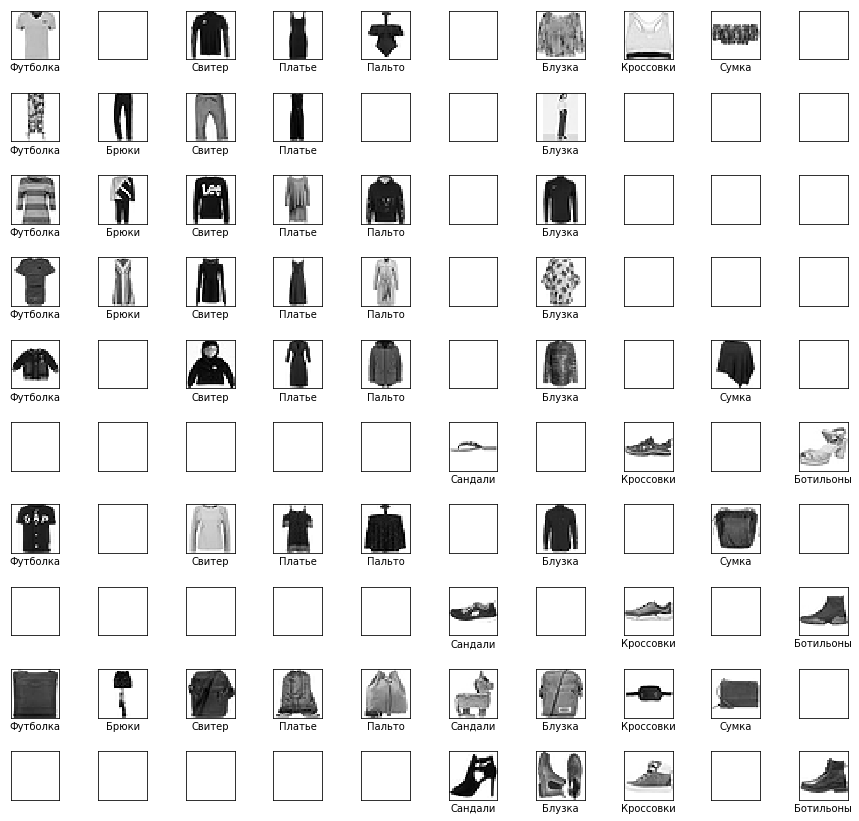

In [16]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.8, hspace=0.1)
for i in range(NUM_CLASSES * NUM_CLASSES):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if most_similar[i][0] == -1:
        plt.imshow(blank_image, cmap=plt.cm.binary)
        continue
    plt.imshow(test_images[most_similar[i][0]], cmap=plt.cm.binary)
    plt.xlabel(class_names[i % NUM_CLASSES])
plt.show()
